Followed https://www.youtube.com/watch?v=QIUxPv5PJOY&t=215s

In [1]:
pip install tensorflow


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web
from datetime import date
from datetime import datetime, timedelta, date

In [3]:
my_stock_list = ['AAPL','GOOG','TSLA','AMZN','PXD','JD','UNH']

In [4]:
#get stock quote
year_ago = str(date.today()-timedelta(days=365))
today = str(date.today())
ticker = 'GOOG'
source = 'yahoo'
df = web.DataReader(ticker, data_source = source, start = year_ago, end = today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-30,2516.000000,2495.149902,2513.071045,2506.320068,1200300,2506.320068
2021-07-01,2529.250000,2496.995117,2496.995117,2527.370117,856000,2527.370117
2021-07-02,2576.959961,2535.379883,2536.790039,2574.379883,1058000,2574.379883
2021-07-06,2597.689941,2568.179932,2588.989990,2595.419922,1067500,2595.419922
2021-07-07,2612.798096,2595.199951,2606.820068,2601.550049,834000,2601.550049
...,...,...,...,...,...,...
2022-06-24,2372.750000,2272.060059,2272.060059,2370.760010,1954700,2370.760010
2022-06-27,2385.000000,2320.014893,2378.699951,2332.449951,1642000,2332.449951
2022-06-28,2357.129883,2248.879883,2327.020020,2251.429932,1411600,2251.429932


In [5]:
ran = df.values
ran[:,3]

array([2506.32006836, 2527.37011719, 2574.37988281, 2595.41992188,
       2601.55004883, 2583.54003906, 2591.48999023, 2611.2800293 ,
       2619.88989258, 2641.64990234, 2625.33007812, 2636.90991211,
       2585.08007812, 2622.0300293 , 2652.01000977, 2666.57006836,
       2756.32006836, 2792.88989258, 2735.92993164, 2727.62988281,
       2730.81005859, 2704.41992188, 2719.79003906, 2725.60009766,
       2720.57006836, 2738.80004883, 2740.7199707 , 2760.04003906,
       2761.92993164, 2753.79003906, 2767.79003906, 2768.12011719,
       2778.32006836, 2746.01000977, 2731.39990234, 2738.27001953,
       2768.73999023, 2821.98999023, 2847.9699707 , 2859.        ,
       2842.45996094, 2891.01000977, 2909.38989258, 2909.23999023,
       2916.84008789, 2884.37988281, 2895.5       , 2910.37988281,
       2897.66992188, 2898.27001953, 2838.41992188, 2869.30004883,
       2868.12011719, 2904.12011719, 2887.4699707 , 2829.27001953,
       2780.34008789, 2792.92993164, 2818.77001953, 2836.53002

In [6]:
#get number of rows and columns
df.shape

(253, 6)

Text(0, 0.5, 'Price')

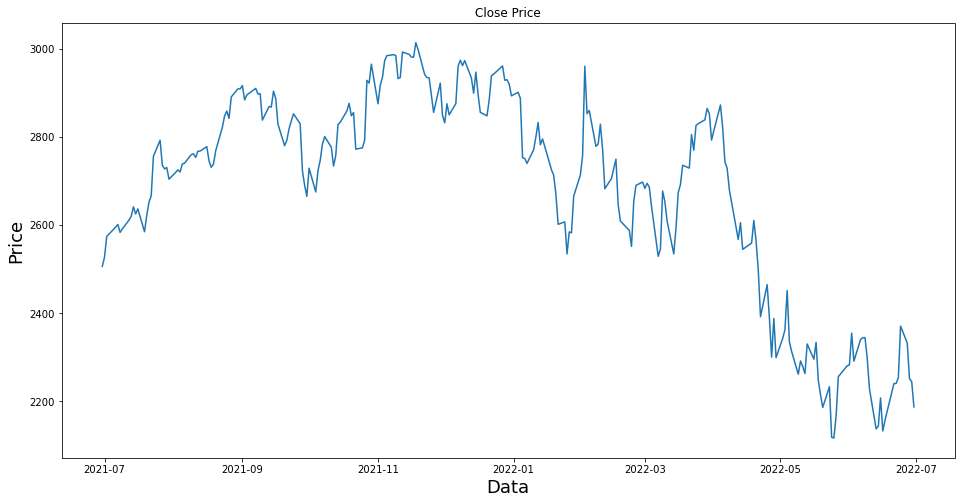

In [7]:
#visualize
plt.figure(figsize =(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [8]:
#create X and Y dataframes
X = pd.DataFrame(df.drop(columns = ['Close']))
y = pd.DataFrame(df['Close'])

In [9]:
X

,High,Low,Open,Volume,Adj Close
Date,,,,,
2021-06-30,2516.000000,2495.149902,2513.071045,1200300,2506.320068
2021-07-01,2529.250000,2496.995117,2496.995117,856000,2527.370117
2021-07-02,2576.959961,2535.379883,2536.790039,1058000,2574.379883
2021-07-06,2597.689941,2568.179932,2588.989990,1067500,2595.419922
2021-07-07,2612.798096,2595.199951,2606.820068,834000,2601.550049
...,...,...,...,...,...
2022-06-24,2372.750000,2272.060059,2272.060059,1954700,2370.760010
2022-06-27,2385.000000,2320.014893,2378.699951,1642000,2332.449951
2022-06-28,2357.129883,2248.879883,2327.020020,1411600,2251.429932


In [10]:
import math
#create new dataframe with only close

#convert dataframe in numpy array
X = X.values
y = y.values
#get number of rows to train our model on
training_data_len = math.ceil(X.shape[0]*.99)

In [11]:
training_data_len


251

In [12]:
#scale data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)
scaled_data

array([[0.42457068, 0.47293898, 0.43901736, 0.15587284, 0.43407   ],
       [0.43906581, 0.474874  , 0.42181336, 0.0674593 , 0.45752697],
       [0.49125917, 0.51512691, 0.46440074, 0.11933131, 0.50991197],
       ...,
       [0.2507712 , 0.21468331, 0.23991091, 0.21013302, 0.150035  ],
       [0.15905275, 0.19601721, 0.14996296, 0.08682143, 0.14301459],
       [0.1062248 , 0.10700607, 0.11466874, 0.33460197, 0.07873937]])

In [13]:
scaled_data.shape

(253, 5)

In [14]:
scaled_y.shape

(253, 1)

In [15]:
#create the training dataset

#create scaled data
X = scaled_data[0:training_data_len, :]
Y = scaled_y[0:training_data_len, :]
#split data into X_train and y_train
X_train = []
y_train = []
for i in range(30, len(X)):
    X_train.append(X[i-30:i, :].ravel())
    y_train.append(Y[i, :])
    if i<=30:
        print(X_train)
        print(y_train)
        print()


[array([0.42457068, 0.47293898, 0.43901736, 0.15587284, 0.43407   ,
       0.43906581, 0.474874  , 0.42181336, 0.0674593 , 0.45752697,
       0.49125917, 0.51512691, 0.46440074, 0.11933131, 0.50991197,
       0.51393719, 0.54952329, 0.52026362, 0.12177084, 0.53335778,
       0.53046509, 0.57785834, 0.53934486, 0.06180987, 0.54018885,
       0.51717531, 0.54178424, 0.49459023, 0.10161265, 0.52011952,
       0.51317147, 0.56073376, 0.50945479, 0.04160033, 0.52897849,
       0.5333114 , 0.57450265, 0.52848247, 0.06519953, 0.55103138,
       0.56114225, 0.59625203, 0.55091321, 0.06101382, 0.56062572,
       0.58201506, 0.62269943, 0.57274486, 0.07762827, 0.58487383,
       0.57324138, 0.59543404, 0.58555478, 0.06060295, 0.56668795,
       0.56422706, 0.60012156, 0.56716931, 0.03839043, 0.57959186,
       0.54374793, 0.55220795, 0.55677799, 0.17775153, 0.52183565,
       0.56025286, 0.56587008, 0.53213192, 0.09267629, 0.56301056,
       0.57372827, 0.59550752, 0.5488907 , 0.03692671, 0.5964

In [16]:
y_train

[array([0.72543719]),
 array([0.72580501]),
 array([0.73717125]),
 array([0.70116677]),
 array([0.6848861]),
 array([0.69254177]),
 array([0.72649576]),
 array([0.78583452]),
 array([0.81478512]),
 array([0.82707635]),
 array([0.80864508]),
 array([0.86274648]),
 array([0.88322797]),
 array([0.88306093]),
 array([0.89153004]),
 array([0.85535825]),
 array([0.86774987]),
 array([0.88433116]),
 array([0.87016791]),
 array([0.87083662]),
 array([0.80414309]),
 array([0.83855414]),
 array([0.83723929]),
 array([0.87735563]),
 array([0.85880166]),
 array([0.79394696]),
 array([0.73942224]),
 array([0.75345165]),
 array([0.78224636]),
 array([0.8020371]),
 array([0.82001132]),
 array([0.79478272]),
 array([0.67628341]),
 array([0.63922035]),
 array([0.61123936]),
 array([0.68249037]),
 array([0.62237163]),
 array([0.67612752]),
 array([0.70235919]),
 array([0.74317744]),
 array([0.76257832]),
 array([0.73564447]),
 array([0.68807324]),
 array([0.71452773]),
 array([0.79279916]),
 array([0.79

In [17]:
#convert x_train and Y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape

(221, 150)

In [19]:
#reshape x_train
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [20]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False ))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
#compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
#train model
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

221/221 [==============================] - 15s 55ms/step - loss: 0.0201


In [23]:
#create testing dataset
test_data = scaled_data[training_data_len-30: , :]
#create x_test, y_test
X_test =[]
y_test = y[training_data_len:,]
for i in range(30, len(test_data)):
    X_test.append(test_data[i-30:i,:].ravel())

In [24]:
y_test

array([[2245.12988281],
       [2187.44995117]])

In [25]:
#convert data to a numpy array
X_test = np.array(X_test)
X_test

array([[0.2234438 , 0.25434403, 0.2192137 , 0.14657696, 0.19953429,
        0.23700921, 0.27536989, 0.25867104, 0.12467259, 0.24207983,
        0.20349323, 0.20834956, 0.21607817, 0.20692312, 0.14623519,
        0.15736799, 0.17324015, 0.14338152, 0.22245904, 0.10933918,
        0.13466807, 0.08735403, 0.14861454, 0.33023471, 0.07741336,
        0.12275483, 0.14568623, 0.10620378, 0.25283755, 0.12986556,
        0.        , 0.        , 0.02644389, 0.62297776, 0.00192779,
        0.00327551, 0.04201498, 0.        , 0.33426634, 0.        ,
        0.05601693, 0.06879264, 0.01944493, 0.23653125, 0.05474753,
        0.14162585, 0.15398648, 0.09945094, 0.23185763, 0.15510531,
        0.2196368 , 0.21737846, 0.16987897, 0.50634277, 0.18274107,
        0.24076146, 0.23789048, 0.2095286 , 0.21524318, 0.18492514,
        0.25167928, 0.23280434, 0.19361529, 0.20037492, 0.26535833,
        0.21812725, 0.24035495, 0.23223786, 0.16930307, 0.19444167,
        0.2845094 , 0.3003449 , 0.24829043, 0.15

In [26]:
#reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(2, 150, 1)

In [27]:
#get models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


1/1 [==============================] - 1s 994ms/step


In [28]:
#getting the root mean squared error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

113.488037109375

C:\Users\jyama\AppData\Local\Temp/ipykernel_1304/1476690831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


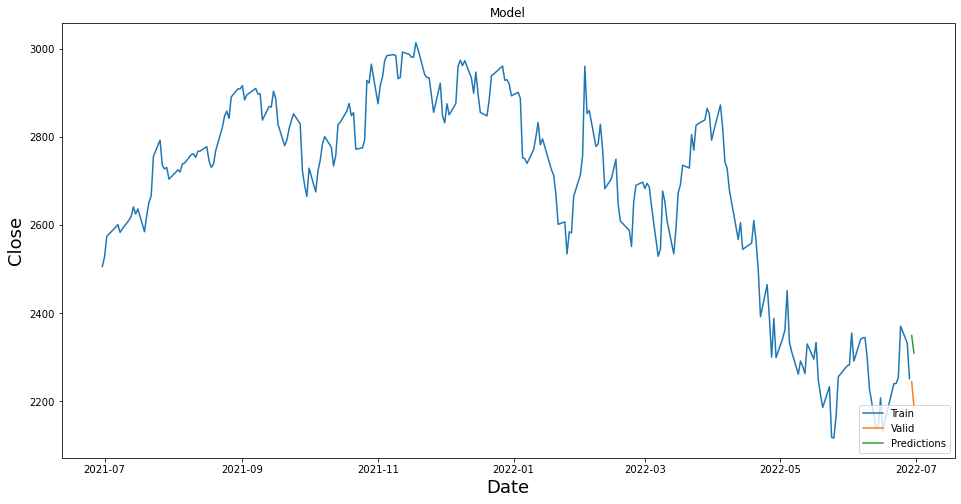

In [29]:
#plot data
data = df.filter(['Close'])
train= data[0:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions

#visualize
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')

In [30]:
#show the valid acutal price vs predicted
valid

,Close,Predictions
Date,,
2022-06-29,2245.129883,2349.527344
2022-06-30,2187.449951,2310.028564


In [31]:
close = df['Close'].values
close.shape

(253,)

In [32]:
#predict tomorrows price
X_val = X[-30:,:].ravel()
X_v = []
X_v.append(X_val)
X_v = np.array(X_v)
X_v = np.reshape(X_v ,(X_v.shape[0],X_v.shape[1],1))
tomorrow = model.predict(X_v)
tomorrow = float(scaler.inverse_transform(tomorrow))
print(tomorrow)


1/1 [==============================] - 0s 32ms/step
2349.52734375


In [33]:
#get percentage of change
percent_from_close = (tomorrow - close[-1:])/close[-1:]
print(percent_from_close*100)

[7.40942176]


In [34]:
percent_from_predict = (tomorrow - valid['Predictions'].values[1])/valid['Predictions'].values[1]
print(percent_from_predict*100)

1.7098827220011419
